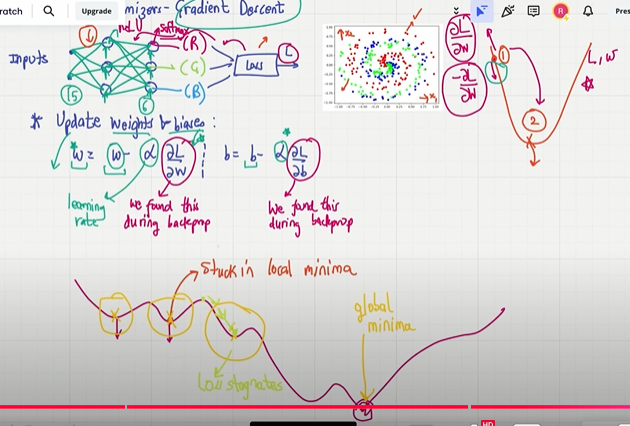

<p style='background-color:green;'> gradient descent optimizer</p>

SGD

In [1]:
# SGD optimizer
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is defuult for this optimizer
    def __init__(self, learning_rate=0.5):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer): 
        layer.weights += -self.learning_rate * layer.dweights   #w_new = w_old - lr * dw  
        layer.biases += -self.learning_rate * layer.dbiases   #x += -y or x -= y is a shorthand for x = x - y.


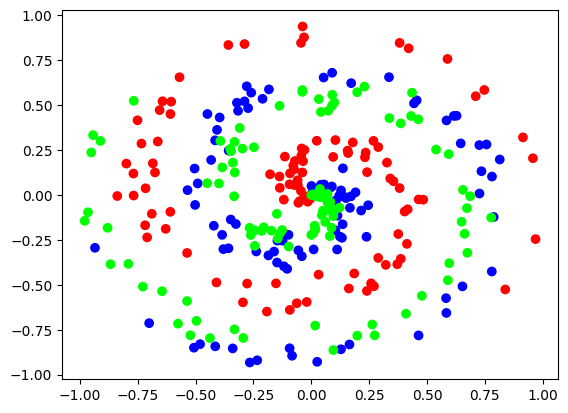

In [3]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [4]:
from Dense_Layer import Layer_Dense
from ReLU_Act import Activation_ReLU
from SGD_optimizer import Optimizer_SGD
from Softmax_Act import Activation_Softmax
from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy
from softmax_loss_catcrossentropy import Activation_Softmax_Loss_CategoricalCrossentropy

In [7]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD()

# Train in loop
for epoch in range(501):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 10:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.390, loss: 1.099
epoch: 10, acc: 0.420, loss: 1.099
epoch: 20, acc: 0.423, loss: 1.098
epoch: 30, acc: 0.417, loss: 1.098
epoch: 40, acc: 0.430, loss: 1.098
epoch: 50, acc: 0.430, loss: 1.098
epoch: 60, acc: 0.433, loss: 1.098
epoch: 70, acc: 0.433, loss: 1.098
epoch: 80, acc: 0.447, loss: 1.098
epoch: 90, acc: 0.453, loss: 1.098
epoch: 100, acc: 0.450, loss: 1.097
epoch: 110, acc: 0.447, loss: 1.097
epoch: 120, acc: 0.447, loss: 1.097
epoch: 130, acc: 0.450, loss: 1.096
epoch: 140, acc: 0.450, loss: 1.095
epoch: 150, acc: 0.453, loss: 1.094
epoch: 160, acc: 0.447, loss: 1.093
epoch: 170, acc: 0.437, loss: 1.092
epoch: 180, acc: 0.427, loss: 1.091
epoch: 190, acc: 0.430, loss: 1.089
epoch: 200, acc: 0.430, loss: 1.088
epoch: 210, acc: 0.430, loss: 1.086
epoch: 220, acc: 0.430, loss: 1.084
epoch: 230, acc: 0.437, loss: 1.083
epoch: 240, acc: 0.450, loss: 1.081
epoch: 250, acc: 0.460, loss: 1.080
epoch: 260, acc: 0.460, loss: 1.078
epoch: 270, acc: 0.463, loss: 1.077
epo

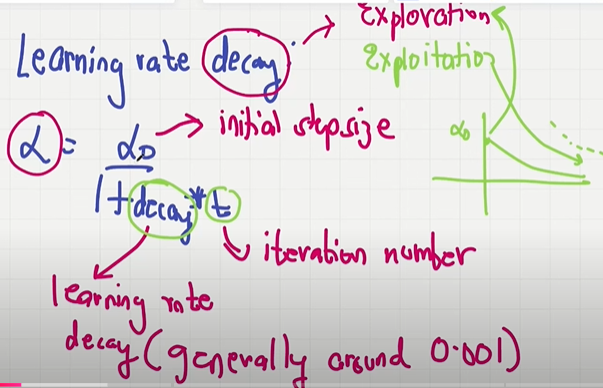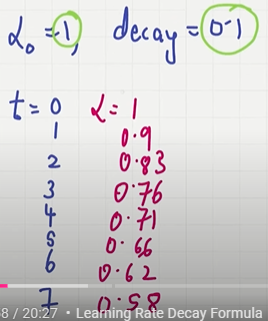

In [9]:
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer): 
        layer.weights += -self.learning_rate * layer.dweights   #w_new = w_old - lr * dw  
        layer.biases += -self.learning_rate * layer.dbiases   #x += -y or x -= y is a shorthand for x = x - y.

   # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [10]:
import numpy as np

# Assuming the necessary classes (Layer_Dense, Activation_ReLU, 
# Activation_Softmax_Loss_CategoricalCrossentropy, and spiral_data) are defined elsewhere

X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(decay=1e-3)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.327, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.420, loss: 1.077, lr: 0.9099181073703367
epoch: 200, acc: 0.450, loss: 1.067, lr: 0.8340283569641367
epoch: 300, acc: 0.447, loss: 1.065, lr: 0.7698229407236336
epoch: 400, acc: 0.460, loss: 1.063, lr: 0.7147962830593281
epoch: 500, acc: 0.463, loss: 1.062, lr: 0.66711140760507
epoch: 600, acc: 0.480, loss: 1.058, lr: 0.6253908692933083
epoch: 700, acc: 0.490, loss: 1.051, lr: 0.5885815185403178
epoch: 800, acc: 0.490, loss: 1.037, lr: 0.5558643690939411
epoch: 900, acc: 0.417, loss: 1.034, lr: 0.526592943654555
epoch: 1000, acc: 0.423, loss: 1.010, lr: 0.5002501250625312
epoch: 1100, acc: 0.410, loss: 0.990, lr: 0.4764173415912339
epoch: 1200, acc: 0.493, loss: 0.972, lr: 0.45475216007276037
epoch: 1300, acc: 0.447, loss: 0.959, lr: 0.43497172683775553
epoch: 1400, acc: 0.453, loss: 0.960, lr: 0.4168403501458941
epoch: 1500, acc: 0.527, loss: 0.941, lr: 0.4001600640256102
epoch: 1600, acc: 0.517, loss: 0.937, lr: 0.38476337